# Handling and Removing Outliers

**Definition:**


*  **Outliers**: Outliers are data points that differ significantly from other observations.They can occur due to variability in the data or experimental errors.
*   **Handling Outliers**: This involves identifying and deciding whether to remove or adjust outliers to improve the accuracy of statistical analyses and machine learning models.

**Use Case in Real Life**:


*   **Financial Data Analysis**: Identify and remove outliers in financial transaction data to prevent fraudlent activities and improve the accuracy of finacial models.
*   **Customer Data Segment**: Clean customer data by handling outliers in age, income, and spending to create accurate customer segements and improve marketing strategies.
*   **Health Data Analysis**: Detect and handle outliers in patient health records, such as blood pressure and cholestrol levels, to ensure accurate diagnoses and treatment plans.







# Loading the dataset

In [2]:
import pandas as pd

# load the dataset
df = pd.read_csv('Outliers_data.csv')
print(df)

      Name  Age   Salary   Department
0    Alice   25    50000           HR
1      Bob   30  1200000  Engineering
2  Charlie   35    70000  Engineering
3    David   50    60000           HR
4      Eve   28    80000           HR
5    Frank   40    55000        Sales
6    Grace   50    85000        Sales
7     Hank   60    90000        Sales


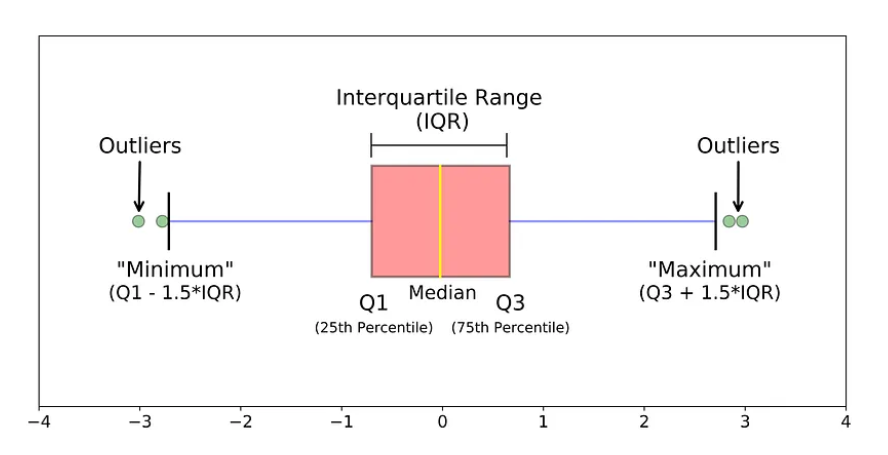

# Visualizing Ouliers using Boxplots

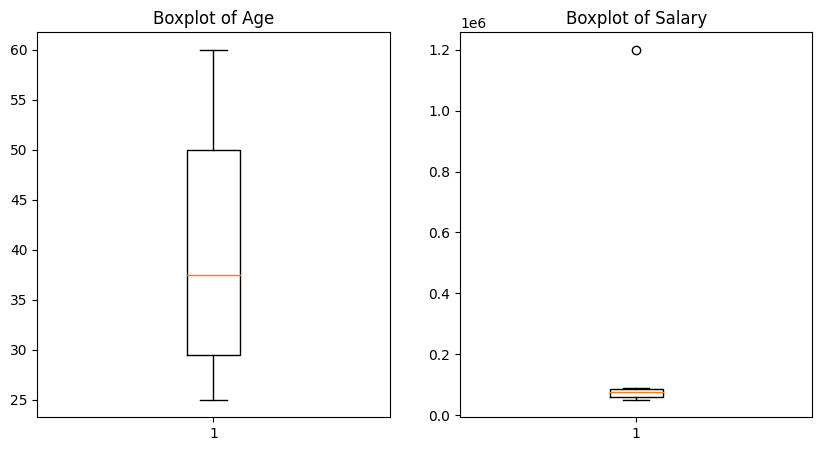

In [4]:
import matplotlib.pyplot as plt

# Boxplot to visualize outliers in the Age column
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(df['Age'].dropna())
plt.title('Boxplot of Age')

# Boxplot to visualize outliers in the salary column
plt.subplot(1,2,2)
plt.boxplot(df['Salary'].dropna())
plt.title('Boxplot of Salary')

plt.show()

# Idenitfying Outliers- Using Statistical Methods (Z-Score)

In [9]:
from scipy import stats

# Calculating Z-Scores
z_scores = stats.zscore(df[['Age', 'Salary']].dropna())
abs_zscores = abs(z_scores)
filtered_entries = (abs_zscores < 3).all(axis=1)
df_no_outliers = df[filtered_entries]

print("Ouliers identified using z-score method.")
print(df[~filtered_entries])

Ouliers identified using z-score method.
Empty DataFrame
Columns: [Name, Age, Salary, Department]
Index: []


# Identifying Outliers - using IQR Method

In [14]:
# Calculating IQR
Q1 = df[['Age', 'Salary']].quantile(0.25)
Q3 = df[['Age', 'Salary']].quantile(0.75)
IQR = Q3 - Q1

# Filtering out the outliers
df_no_outliers = df[~((df[['Age', 'Salary']] < (Q1 - 1.5 * IQR)) | (df[['Age', 'Salary']] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Outliers identified using IQR method.")
print(df[((df[['Age', 'Salary']] < (Q1 - 1.5*IQR)) | (df[['Age', 'Salary']] > (Q3 + 1.5 * IQR))).any(axis=1)])

Outliers identified using IQR method.
  Name  Age   Salary   Department
1  Bob   30  1200000  Engineering


# Handling Outliers - Removing Outliers

In [13]:
# Using Z-Score to remove outliers
df_no_outliers = df[filtered_entries]
print('Data after removing Outliers using Z-Score method')
print(df_no_outliers)

Data after removing Outliers using Z-Score method
      Name  Age   Salary   Department
0    Alice   25    50000           HR
1      Bob   30  1200000  Engineering
2  Charlie   35    70000  Engineering
3    David   50    60000           HR
4      Eve   28    80000           HR
5    Frank   40    55000        Sales
6    Grace   50    85000        Sales
7     Hank   60    90000        Sales


# Handling Outliers - Capping Outliers

In [15]:
# Capping the outliers using IQR Method
df_capped = df.copy()
for column in ['Age', 'Salary']:
  Q1 = df_capped[column].quantile(0.25)
  Q3 = df_capped[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_capped[column] = df_capped[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

print("Outliers identified using IQR method.")
print(df_capped)


Outliers identified using IQR method.
      Name  Age    Salary   Department
0    Alice   25   50000.0           HR
1      Bob   30  127500.0  Engineering
2  Charlie   35   70000.0  Engineering
3    David   50   60000.0           HR
4      Eve   28   80000.0           HR
5    Frank   40   55000.0        Sales
6    Grace   50   85000.0        Sales
7     Hank   60   90000.0        Sales


# Handling Outliers - Replacing Outliers with Mean/Median


In [16]:
# Replacing Outliers with median values
df_replaced = df.copy()
for column in ['Age', 'Salary']:
  Q1 = df_replaced[column].quantile(0.25)
  Q3 = df_replaced[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  median = df_replaced[column].median()
  df_replaced[column] = df_replaced[column].apply(lambda x: median if x > upper_bound or  x < lower_bound else x)

print("Data after replacing outliers with median values.")
print(df_replaced)

Data after replacing outliers with median values.
      Name  Age   Salary   Department
0    Alice   25  50000.0           HR
1      Bob   30  75000.0  Engineering
2  Charlie   35  70000.0  Engineering
3    David   50  60000.0           HR
4      Eve   28  80000.0           HR
5    Frank   40  55000.0        Sales
6    Grace   50  85000.0        Sales
7     Hank   60  90000.0        Sales
